# Introduction to Probability

## Outline

* History of probability
* What is a probability?
* Sample space and events
* Probability axioms
* Probabilities of combined events: union, intersection and complement
* Law of total probability
* Counting methods

## History of Probability

### Chevalier de Méré (~1654)

** What's likelier **: 

* rolling at least **one six** in **4 throws** of *a single die*
* rolling at least **one double six** in **24 throws** of a *pair of dice*

Chevalier de Méré's reasoning:

* chance of one six $= \frac{1}{6}$
* average number in four rolls $= 4 \times \left(\frac{1}{6}\right) = \frac{2}{3}$
* chance of double six in one roll $= \frac{1}{36}$
* average number in 24 rolls $= 24 \times \left(\frac{1}{36}\right) = \frac{2}{3}$

### Let's run a simulation:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(help(randint))

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is the *highest* such
        integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which ca

Let's simulate 4 rolls of the dice:

In [5]:
6 in randint(1, 6 + 1, 4)  # [low, high) *not* inclusive

True

Now let's do this 2000 times:

0.53100000000000003

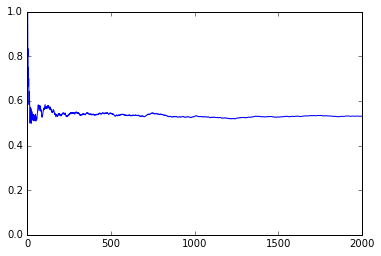

In [7]:
one6in4 = [6 in randint(1, 6 + 1, 4) for _ in range(2000)]
plot(cumsum(one6in4)/(list(range(1, 2001))))
ylim(0, 1)
mean(one6in4)

Somewhat less than $^2/_3$ but still good if one is betting even odds.


What about two dice?

Can we get a double six on 24 rolls of a pair of dice?

In [10]:
12 in [sum(randint(1, 6 + 1, 2)) for _ in range(24)]

True

Now let's simulate 2000 trials:

0.4985

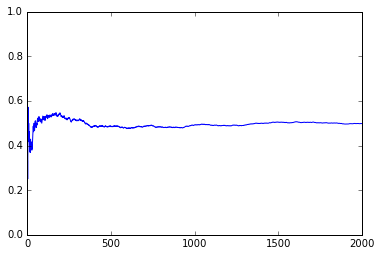

In [12]:
one12in24 = [12 in [sum(randint(1, 6 + 1, 2)) for _ in range(24)] for _ in range(2000)]
plot(cumsum(one12in24)/(list(range(1, 2001))))
ylim(0, 1)
mean(one12in24)

Not so good for de Méré


Why did he *lose more often* with the second gamble?


De Méré asked his friend, Blaise Pascal what was going on.


Pascal consulted with Pierre de Fermat and the Theory of Probability was born.

## Probability

A probability is a number between 0 and 1 representing how likely it is that an event will occur.

Probabilities can be:

1. Frequentist (based on frequencies):
$\frac{number \ of \ times \ event \ occurs}{number \ of \ opportunities \ for \ event \ to \ occur}$  

2. Subjective: represents a person's degree of belief that an event will occur

    e.g. I think there is an 80% chance it will be sunny today, written as P(sunny) = 0.80
    

The rules for manipulating probabilities are the same, regardless how we interpret probabilities.

## Sample Space

Some definitions:

* ** Random experiment **: An experiment whose outcome is not known until it is observed


* ** Sample space **, $\Omega$: A set of outcomes of a random experiment  
    Every possbile outcome must be listed ** once and only once ** 
    
    
* ** Sample point **: An element of the sample space  
    e.g. if $\Omega = \{s_1, \ s_2, \ s_3, \ s_4, \ s_5\}$, then every $s_i$ is a sample point

### Examples

* Experiment: Toss a coin twice and observe the result  
    Sample space: $\Omega = \{HH, \ HT, \ TH, \ TT\}$  
    An example of a sample point is: $HT$


* Experiment: Toss a coin twice and count the number of heads  
    Sample space: $\Omega = \{0, \ 1, \ 2\}$  
    An example of a sample point is: $2$


* Experiment: Toss a coin twice and observe whether the two tosses are the same (e.g. HH or TT)  
    Sample space: $\Omega = \{same, \ different\}$  
    An example of a sample point is: $same$

### Discrete and Continuous Sample Spaces

* A sample space is ** finite ** if it has a finite number of elements; otherwise, it is ** infinite **


* A sample space is ** discrete ** if the elements in it can be listed, e.g. $1, \ 2, \ 3, \dots$  
    In mathematical language, a sample space is discrete if it is ** countable **
    
    
* A sample space is ** continuous ** if there are no gaps between the elements, so the elements cannot be listed, e.g. the interval $[0, \ 1]$

### Examples

$\Omega = \{HH, \ HT, \ TH, \ TT\}$ (discrete, finite)

$\Omega = \{0, \ 1, \ 2, \ \dots\}$ (discrete, infinite)

$\Omega = [0, \ 1]$ (continuous, infinite)

$\Omega = \{ [0, 90), [90, 360) \}$ (discrete, finite)

## Events

An ** event ** is a subset of the sample space. That is, any collection of outcomes forms an event.

### Example: 

Toss a coin twice. Sample space: $\Omega = \{HH, \ HT, \ TH, \ TT\}$  

Let event $A$ be the event that there is ** exactly one head **  

We write: $A =“exactly \ one \ head”$  

Then $A = \{HT, \ TH \}$

$A$ is a subset of $\Omega$, and we write $A \subset \Omega$

Event $A$ ** occurs ** if we observe an outcome that is a member of the set $A$.

** Note **: 
* $\Omega$ is a subset of itself, so $\Omega$ is an event.
* The empty set, $\emptyset = \{\}$, is also a subset of $\Omega$. This is call the ** null event **, or the event with no outcomes.


### Example:

Experiment: throw 2 dice  

Sample space: $\Omega = \{(1, 1), (1, 2), \dots, (1, 6), (2, 1), (2, 2), \dots, (2, 6), \dots, (6, 6)\}$


Event $A = “sum \ of \ two \ faces \ is \ 5” = \{(1, 4), (2, 3), (3, 2), (4, 1)\}$

## Combining Events

Formulating random events in terms of sets gives us the power of set theory to describe all possible ways of combining or manipulating events. For example, we need to describe things like coincidences (events happening together), alternatives, opposites, and so on. We do this in the language of set theory.

* The ** union ** of two events $A$ and $B$, denoted $A \cup B$, is the set of outcomes that belong either to $A$, to $B$, or to both. In words,  $A \cup B$ means "A and/or B." 
* The ** intersection ** of two events $A$ and $B$, denoted $A \cap B$, is the set of outcomes that belong both to $A$ and to $B$. In words, $A \cap B$ means “A and B.”
* The ** complement ** of an event $A$, denoted $A^c$, is the set of outcomes that do not belong to $A$. In words, $A^c$ means "not A."


### Venn Diagram

![Venn](images/venn.png)

This sort of diagram representing events in a sample space is called a Venn
diagram.

a) $A \cup B\quad(e.g. 6$ on either $die_1$ or $die_2$ (or both)$)$  
b) $A \cap B\quad(e.g. 6$ on **both** $die_1$ and $die_2)$  
c) $B \cap A^c\quad(e.g. 6$ on $die_2$ **but not** on $die_1)$



** Limitations of Venn Diagrams **


Venn diagrams are generally useful for up to 3 events, although they are not used to provide formal proofs. For more than 3 events, the diagram might not be able to represent all possible overlaps of events.

### Properties of union, intersection, and complement


1. $\emptyset^c = \Omega$ and $\Omega^c = \emptyset$

2. For any event $A$, $A \cup A^c = \Omega$ and $A \cap A^c = \emptyset$

3. For any events $A$ and $B$,  

$$A \cup B = B \cup A$$  
$$A \cap B = B \cap A$$

and 

$$(A \cup B)^c = A^c \cap B^c$$  
$$(A \cap B)^c = A^c \cup B^c$$

### Distributive Laws


For any sets $A$, $B$ and $C$:

$ A \cup (B \cap C) = (A \cup B) \cap (A \cup C)$


$ A \cap (B \cup C) = (A \cap B) \cup (A \cap C)$

## Mutually Exclusive Events

Two events $A$ and $B$ are **mutually exclusive**, or **disjoint**, if $A \cap B = \emptyset$.


Any number of events $A_1, A_2, \dots, A_k$ are mutually exclusive if every pair of the events is mutually exclusive: i.e. $A_i \cap A_j = \emptyset$ for all $i, j$ with $i \neq j$.


A **partition** of the sample space $\Omega$ is a collection of mutually exclusive events whose union is $\Omega$.  
That is, sets $A_1, A_2, \dots, A_k$ form a partition of $\Omega$ if  


$$A_i \cap A_j = \emptyset \text{ for all } i, j \text{ with } i \neq j$$

and  


$$A_1 \cup A_2 \cup \dots \cup A_k = \Omega$$

## Axioms of Probability
- For any event A: $P(A) \geq 0$
- The probability of the entire sample space: $P(\Omega) = 1$
- For any countable collection $A_1, A_2,...$ of _mutually exclusive_ events:  

$$P(A_1\cup A_2 \cup \dots) = P(A_1) + P(A_2) + \dots$$

## Theorems of Probability
- The probability of the empty set: $P(\emptyset) = 0$
- The probability of event the "not A": $P(A^c) = 1 - P(A)$
- For any A and B (not necessarily disjoint):   

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

### Note:  

If $A$ and $B$ are mutually exclusive,  
$$P(A \cap B) = P(\emptyset) = 0$$
also,
$$P(A \cup B) = P(A) + P(B)$$

## Independent Events

Events A and B are ** _independent_ ** if and only if:  

$$P(A \cap B) = P(A)P(B)$$

### Question:

What are the probablities of the two events? 

* rolling at least **one six** in **4 throws** of *a single die*
* rolling at least **one double six** in **24 throws** of a *pair of dice*

## Law of Total Probability

If $B_1, B_2, \dots, B_k$ form a partition of $\Omega$, then $(A \cap B_1), (A \cap B_2), \dots, (A \cap B_k)$ form a partition of the set or event A.

![](images/law_total_prob.png)

The probability of event A is therefore the sum of its parts: 

$$P(A) = P(A \cap B_1) + P(A \cap B_2) + P(A \cap B_3) + P(A \cap B_4)$$

## Counting
If experiment $A$ has $n$ possible outcomes, and experiment $B$ has $k$ possible outcomes, then there are $nk$ possible outcomes when you perform both experiments.

#### Example: 
Let $A$ be the experiment "Flip a coin." Let $B$ be "Roll a die." Then $A$ has two outcomes, $H$ and $T$, and $B$ has six outcomes, $1,...,6$. The joint experiment, called "Flip a coin and roll a die" has how many outcomes?

### Theorem
Given $n$ distinguishable objects, there are $n^k$ ways to choose a sample of $k$ objects **_with replacement_**.

#### Example:
How many ways are there to sample 5 students out of 20 with replacement?

### Permutation
* The number of $k$-permutations of $n$ distinguishable objects is $$^nP_k=n(n-1)(n-2)\dots(n-k+1) = \frac{n!}{(n-k)!}$$

* The number of ways to select $k$ objects from $n$ distinct objects when different orderings constitute different choices

#### Example

I have five vases, and I want to put two of them on the table, how many different ways are there to arrange the vases?

### Combination

If order doesn't matter...

- The number of ways to choose $k$ objects out of $n$ distinguishable objects is $$ ^nC_k = \binom{n}{k} = \frac{^nP_k}{k!}=\frac{n!}{k!(n-k)!}$$

#### Example

Q. How many ways are there to get 4 of a kind in a 5 card draw?  

A. Break it down:
1. Q. How many ways are there to get 4 of a kind?  
   A. $\binom{13}{1}$
2. Q. How many ways can you fill the last card?  
   A. $\binom{52-4}{1}$
3. Total: $$\binom{13}{1} \binom{48}{1} = 13 \times 48 = 624$$

#### Example

Q. How many ways are there to get a full house in a 5 card draw?  

A. The matching triple can be any of 13 the denominations and the pair can be any of the remaining 12 denominations.
1. Q. How many ways are there to select the suits of the matching triple?  
   A. $13\binom{4}{3}$
1. Q. How many ways are there to select the suits of the matching pair?  
   A. $12\binom{4}{2}$
3. Total: $$13\binom{4}{3} \times 12\binom{4}{2} = 13 \times 4 \times 12 \times 6 = 3,744$$